In [1]:
import sys
import pandas as pd
import numpy as np
# plot the label distribution of train_val_test_df not using dataplot_obj
import matplotlib.pyplot as plt
import numpy as np

sys.path.append('F:/repo/gpsbeam')

from src.data.dataprep import DataPrep
from src.data.dataplot import DataPlot
from src.config.data_config import DataConfig
from src.data.datatotensor import DataToTensor



# Create Sequential Split

In [2]:
data_config_obj = DataConfig(train_val_test_split_frac=[0.65,0.15, 0.2], 
                             splitting_method='sequential',
                             num_classes=8,
                             scenario_num=23)

dataprep_obj = DataPrep(data_config_obj)

dataprep_obj.get_train_val_test_dataset()

2025-05-20 14:34:36.206 | DEBUG    | src.data.dataprep:_check_path_availability:80 - File/Folder f:/repo/gpsbeam\data/raw/Scenario23/scenario23.csv is available.
2025-05-20 14:35:45.124 | DEBUG    | src.preprocessor.gpsprep:__init__:8 - GpsPrep Initialized.
2025-05-20 14:38:55.598 | INFO     | src.data.dataprep:_generate_train_val_test_dataset:335 - Generating train, validation and test datasets...
2025-05-20 14:39:09.596 | INFO     | src.data.dataprep:_save_to_hickle:589 - 
Train-Test dataset is SAVED as f:/repo/gpsbeam\data/processed/Scenario23/dset_scenario23_seednum42_train0.65_test0.2_portion100_beam8_splitting_method_sequential_shuffle_False_.hkl
2025-05-20 14:39:09.596 | INFO     | src.data.dataprep:get_train_val_test_dataset:311 - 
                    RAW DATASET INFO
                    ------------------------------
                    Scenario Num                                    : 23,
                    Splitting Method                                : sequential
       

# Plot before Split

Saving plot data to ./label_distribution_scenario_23_before_split.csv


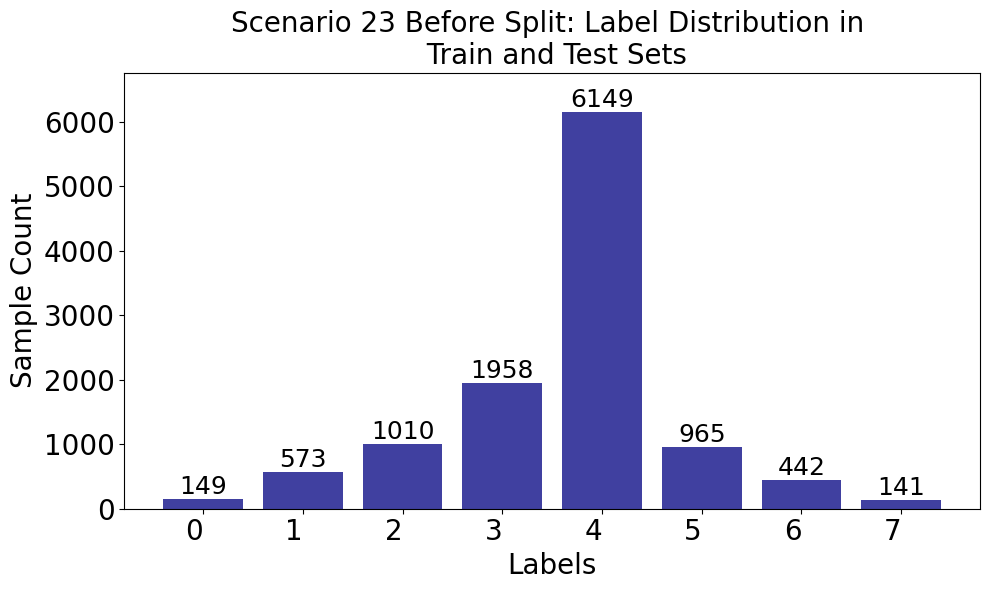

In [3]:
dataprep_obj.data_config.label_column_name = 'unit1_beam_idx_8'

# concat train and test
if 'val' in dataprep_obj.dataset_dict:
    train_test_df = pd.concat([dataprep_obj.convert_to_df(dataprep_obj.dataset_dict['train']),
                              dataprep_obj.convert_to_df(dataprep_obj.dataset_dict['val']),
                              dataprep_obj.convert_to_df(dataprep_obj.dataset_dict['test'])])
else:
    train_test_df = pd.concat([dataprep_obj.convert_to_df(dataprep_obj.dataset_dict['train']),
                              dataprep_obj.convert_to_df(dataprep_obj.dataset_dict['test'])])

# Get unique labels and their counts
unique_labels, counts = np.unique(train_test_df[dataprep_obj.data_config.label_column_name], return_counts=True)
fontsize = 20

# Create a DataFrame with the plot data for later use
plot_data_df = pd.DataFrame({
    'label': unique_labels,
    'count': counts
})
# Save the plot data to CSV
csv_filename = f"./label_distribution_scenario_{data_config_obj.scenario_num}_before_split.csv"
print(f"Saving plot data to {csv_filename}")
plot_data_df.to_csv(csv_filename, index=False)

# Plotting the distribution
plt.figure(figsize=(10, 6))
bars = plt.bar(unique_labels, counts, alpha=0.75, color='navy')

# Add number on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom', fontsize=fontsize-2)

plt.xlabel('Labels', fontsize=fontsize)
plt.ylabel('Sample Count', fontsize=fontsize)
plt.title(f'Scenario {data_config_obj.scenario_num} Before Split: Label Distribution in \n Train and Test Sets', fontsize=fontsize)
plt.xticks(unique_labels, rotation=0, ha='right', fontsize=fontsize)
plt.yticks(fontsize=fontsize)

# Set y-axis limit to be slightly higher than max count for padding
max_count = max(counts)
plt.ylim(0, max_count * 1.1)  # Add 10% padding above highest bar

plt.tight_layout()
plt.savefig(f'./label_distribution_scenario_{data_config_obj.scenario_num}_before_split.pdf', format='pdf', bbox_inches='tight')
# plt.close()
plt.show()


# Plot After split (Sequential)

In [4]:
dataplot_obj = DataPlot()
fontsize = 24
dataplot_obj.plot_label_distribution(dataset_dict=dataprep_obj.dataset_dict,
                                    folder_name='./',
                                    label_column_name=dataprep_obj.data_config.label_column_name,
                                    scenario_num_str=str(data_config_obj.scenario_num),
                                    splitting_method=dataprep_obj.data_config.splitting_method,
                                    fontsize=fontsize,
                                    margin_factor=1.15)

Saving plot data to .//label_distribution_data_scenario_23_sampling_sequential.csv
Saving plot to .//label_distribution_scenario_23_sampling_sequential.pdf


# Create Adjusted without label distribution adjustment

In [5]:
data_config_obj = DataConfig(train_val_test_split_frac=[0.65,0.15, 0.2], 
                             splitting_method='adjusted-without-label-adjustment',
                             num_classes=8,
                             scenario_num=23)

dataprep_obj_adjusted_no_label = DataPrep(data_config_obj)

dataprep_obj_adjusted_no_label.get_train_val_test_dataset()

2025-05-20 14:39:11.866 | DEBUG    | src.data.dataprep:_check_path_availability:80 - File/Folder f:/repo/gpsbeam\data/raw/Scenario23/scenario23.csv is available.
2025-05-20 14:39:14.216 | DEBUG    | src.preprocessor.gpsprep:__init__:8 - GpsPrep Initialized.
2025-05-20 14:39:35.505 | INFO     | src.data.dataprep:_generate_train_val_test_dataset:335 - Generating train, validation and test datasets...
2025-05-20 14:39:35.572 | INFO     | src.data.dataprep:_split_general_case:459 - Chunk size: 113 (0.99%),
                            Distribution score: 0.30470926667171633
2025-05-20 14:39:35.588 | INFO     | src.data.dataprep:_split_general_case:459 - Chunk size: 227 (1.99%),
                            Distribution score: 0.2618728674711218
2025-05-20 14:39:35.622 | INFO     | src.data.dataprep:_split_general_case:459 - Chunk size: 341 (2.99%),
                            Distribution score: 0.3028731135187321
2025-05-20 14:39:35.639 | INFO     | src.data.dataprep:_split_general_case:459

In [6]:
dataplot_obj = DataPlot()
dataplot_obj.plot_label_distribution(dataset_dict=dataprep_obj_adjusted_no_label.dataset_dict,
                                    folder_name='./',
                                    label_column_name=dataprep_obj_adjusted_no_label.data_config.label_column_name,
                                    scenario_num_str=str(data_config_obj.scenario_num),
                                    splitting_method=dataprep_obj_adjusted_no_label.data_config.splitting_method,
                                    fontsize=fontsize,
                                    margin_factor=1.15)

Saving plot data to .//label_distribution_data_scenario_23_sampling_adjusted-without-label-adjustment.csv
Saving plot to .//label_distribution_scenario_23_sampling_adjusted-without-label-adjustment.pdf


# Create Adjusted Splitting

In [7]:
data_config_obj = DataConfig(train_val_test_split_frac=[0.65,0.15, 0.2], 
                             splitting_method='adjusted',
                             num_classes=8,
                             scenario_num=23)

dataprep_obj_adjusted = DataPrep(data_config_obj)

dataprep_obj_adjusted.get_train_val_test_dataset()

2025-05-20 14:39:49.874 | DEBUG    | src.data.dataprep:_check_path_availability:80 - File/Folder f:/repo/gpsbeam\data/raw/Scenario23/scenario23.csv is available.
2025-05-20 14:39:52.227 | DEBUG    | src.preprocessor.gpsprep:__init__:8 - GpsPrep Initialized.
2025-05-20 14:40:13.343 | INFO     | src.data.dataprep:_generate_train_val_test_dataset:335 - Generating train, validation and test datasets...
2025-05-20 14:40:13.410 | INFO     | src.data.dataprep:_split_general_case:459 - Chunk size: 113 (0.99%),
                            Distribution score: 0.30470926667171633
2025-05-20 14:40:13.443 | INFO     | src.data.dataprep:_split_general_case:459 - Chunk size: 227 (1.99%),
                            Distribution score: 0.2618728674711218
2025-05-20 14:40:13.460 | INFO     | src.data.dataprep:_split_general_case:459 - Chunk size: 341 (2.99%),
                            Distribution score: 0.3028731135187321
2025-05-20 14:40:13.476 | INFO     | src.data.dataprep:_split_general_case:459

# Plot After split (Adjusted-Splitting)

In [8]:
dataplot_obj = DataPlot()
dataplot_obj.plot_label_distribution(dataset_dict=dataprep_obj_adjusted.dataset_dict,
                                    folder_name='./',
                                    label_column_name=dataprep_obj_adjusted.data_config.label_column_name,
                                    scenario_num_str=str(data_config_obj.scenario_num),
                                    splitting_method=dataprep_obj_adjusted.data_config.splitting_method,
                                    fontsize=fontsize,
                                    margin_factor=1.15)

Saving plot data to .//label_distribution_data_scenario_23_sampling_adjusted.csv
Saving plot to .//label_distribution_scenario_23_sampling_adjusted.pdf


# inspect

In [9]:
train_dset = dataprep_obj.dataset_dict['train']
train_df =dataprep_obj.convert_to_df(train_dset)
# move column chunk_id to the first column
# train_df = train_df[['chunk_id'] + [col for col in train_df.columns if col != 'chunk_id']]

test_dset = dataprep_obj.dataset_dict['test']
test_df = dataprep_obj.convert_to_df(test_dset)
# test_df = test_df[['chunk_id'] + [col for col in test_df.columns if col != 'chunk_id']]


train_df.head(1)

,sample_idx,from_scenario,seednum,seq_index,unit1_pwr_60ghz,unit1_beam_idx_8,unit1_beam_idx_16,unit1_beam_idx_32,unit1_beam_idx_64,unit1_lidar,...,unit2_x-speed,unit2_y-speed,unit2_z-speed,unit2_pitch,unit2_roll,unit2_height_log,unit2_height_minmax_norm,unit2to1_vector,unit1_loc_vector,unit2_loc_vector
0,1,23,42,1,f:/repo/gpsbeam\data/raw/Scenario23//unit1/mmW...,5,11,21,42,None,...,-2.23694,-0.447388,-4.921268,-6.7,-1.9,3.481119,0.080537,"(-0.16403205548298952, -0.7018817529118233, 0....","(-0.31223244318808985, -0.777000929755819, 0.5...","(-0.31223173129849896, -0.7770006458295892, 0...."


In [10]:
train_df.columns

Index(['sample_idx', 'from_scenario', 'seednum', 'seq_index',
       'unit1_pwr_60ghz', 'unit1_beam_idx_8', 'unit1_beam_idx_16',
       'unit1_beam_idx_32', 'unit1_beam_idx_64', 'unit1_lidar',
       'unit1_lidar_scr', 'unit1_radar', 'unit1_rgb', 'unit2_hdop',
       'unit2_pdop', 'unit1_loc', 'unit2_loc', 'unit2_loc_minmax_norm',
       'unit2_speed', 'unit2_altitude', 'unit2_distance', 'unit2_height',
       'unit2_x-speed', 'unit2_y-speed', 'unit2_z-speed', 'unit2_pitch',
       'unit2_roll', 'unit2_height_log', 'unit2_height_minmax_norm',
       'unit2to1_vector', 'unit1_loc_vector', 'unit2_loc_vector'],
      dtype='object')

# Check rnn_datatotensor


In [11]:
label_column_name = 'unit1_beam_idx_8'
rnn_datatotensor_obj = DataToTensor(data_dict=dataprep_obj.dataset_dict['test'],
                                       model_input_column_list=[label_column_name],
                                        label_column_name=label_column_name,
                                        seq_len=8,
                                        out_len=3,
                                        zero_pad_nonconsecutive=True,
                                        ends_input_with_out_len_zeros=False)

rnn_datatotensor_obj.data_dict.keys()
a =rnn_datatotensor_obj
len(a.samples)
item = a.__getitem__(300)
item

2025-05-20 14:40:28.041 | DEBUG    | src.preprocessor.gpsprep:__init__:8 - GpsPrep Initialized.


{'input_from_scenario': tensor([ 0, 23, 23, 23, 23, 23, 23, 23]),
 'input_seq_idx': tensor([ 0, 27, 27, 27, 27, 27, 27, 27]),
 'input_speed': tensor([0.0000, 0.4474, 0.3132, 0.3132, 0.2237, 0.2237, 0.2237, 0.0000]),
 'input_height': tensor([ 0.0000, 58.7270, 58.7270, 58.7270, 58.7270, 58.7270, 58.7270, 58.7270]),
 'input_value': tensor([[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.5849,  1.2312,  0.8219, -0.7992,  0.4121, -0.1762, -0.0732, -0.5657],
         [ 0.5849,  1.2312,  0.8219, -0.7992,  0.4121, -0.1762, -0.0732, -0.5657],
         [ 0.5849,  1.2312,  0.8219, -0.7992,  0.4121, -0.1762, -0.0732, -0.5657],
         [ 0.5849,  1.2312,  0.8219, -0.7992,  0.4121, -0.1762, -0.0732, -0.5657],
         [ 0.5849,  1.2312,  0.8219, -0.7992,  0.4121, -0.1762, -0.0732, -0.5657],
         [ 0.5849,  1.2312,  0.8219, -0.7992,  0.4121, -0.1762, -0.0732, -0.5657],
         [ 0.5849,  1.2312,  0.8219, -0.7992,  0.4121, -0.1762, -0.0732, -0.5657]]),
 'in

In [12]:
# see at the "input_value"
print("item.input_value.shape: ", item['input_value'].shape)
print("item.input_value: ", item['input_value'])


item.input_value.shape:  torch.Size([8, 8])
item.input_value:  tensor([[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.5849,  1.2312,  0.8219, -0.7992,  0.4121, -0.1762, -0.0732, -0.5657],
        [ 0.5849,  1.2312,  0.8219, -0.7992,  0.4121, -0.1762, -0.0732, -0.5657],
        [ 0.5849,  1.2312,  0.8219, -0.7992,  0.4121, -0.1762, -0.0732, -0.5657],
        [ 0.5849,  1.2312,  0.8219, -0.7992,  0.4121, -0.1762, -0.0732, -0.5657],
        [ 0.5849,  1.2312,  0.8219, -0.7992,  0.4121, -0.1762, -0.0732, -0.5657],
        [ 0.5849,  1.2312,  0.8219, -0.7992,  0.4121, -0.1762, -0.0732, -0.5657],
        [ 0.5849,  1.2312,  0.8219, -0.7992,  0.4121, -0.1762, -0.0732, -0.5657]])


# Check datatotensor with ends zero pad

In [13]:
rnn_datatotensor_obj = DataToTensor(data_dict=dataprep_obj.dataset_dict['test'],
                                       model_input_column_list=['sample_idx'],
                                        label_column_name='unit1_beam_idx_8',
                                        seq_len=8,
                                        out_len=3,
                                        zero_pad_nonconsecutive=True,
                                        ends_input_with_out_len_zeros=True)

rnn_datatotensor_obj.data_dict.keys()
a =rnn_datatotensor_obj
item = a.__getitem__(4)
item


2025-05-20 14:40:30.286 | DEBUG    | src.preprocessor.gpsprep:__init__:8 - GpsPrep Initialized.


{'input_from_scenario': tensor([ 0, 23, 23, 23, 23, 23, 23, 23]),
 'input_seq_idx': tensor([ 0, 27, 27, 27, 27, 27, 27, 27]),
 'input_speed': tensor([0.0000, 1.3645, 1.1408, 2.5054, 4.4962, 6.9569, 7.8293, 9.1715]),
 'input_height': tensor([  0.0000, 269.6851, 269.6851, 269.6851, 269.6851, 269.6851, 269.6851,
         269.6851]),
 'input_value': tensor([[   0.],
         [9115.],
         [9116.],
         [9117.],
         [9118.],
         [9119.],
         [9120.],
         [9121.],
         [   0.],
         [   0.],
         [   0.]]),
 'input_beam_idx': tensor([0, 4, 4, 4, 4, 4, 4, 4]),
 'input_pitch': tensor([ 0.0000, -0.6000, -0.1000, -0.9000, -1.2000, -1.2000, -1.3000, -1.3000]),
 'input_roll': tensor([ 0.0000, 24.5000, 27.0000, 23.4000, 22.0000, 20.6000, 20.1000, 19.5000]),
 'label': tensor([4, 4, 4, 4]),
 'future_sample_idx': tensor([9121, 9122, 9123, 9124]),
 'input_sample_idx': tensor([   0, 9115, 9116, 9117, 9118, 9119, 9120, 9121])}

In [14]:
# see at the "input_value"
print("item.input_value.shape: ", item['input_value'].shape)
print("item.input_value: ", item['input_value'])


item.input_value.shape:  torch.Size([11, 1])
item.input_value:  tensor([[   0.],
        [9115.],
        [9116.],
        [9117.],
        [9118.],
        [9119.],
        [9120.],
        [9121.],
        [   0.],
        [   0.],
        [   0.]])
